In [60]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import sympy as sp

In [61]:
x, y, theta, alpha, beta = sp.symbols("x y theta alpha beta")
L = sp.Symbol("L")
theta_min, theta_max = sp.symbols("theta_1, theta_2")

cam_deflection = 3 # in (must be > 2in)
cam_beta_coeff = np.deg2rad(15) # "camming angle", degrees
cam_theta_min = np.deg2rad(210) # must be >= 180 degrees
cam_theta_max = np.deg2rad(360)

spr_radius = alpha * sp.exp(sp.tan(beta) * theta)

print("logarithmic spiral radius = ")
display(spr_radius)

cam_r_min = spr_radius.subs(theta, theta_min)
cam_r_max = spr_radius.subs(theta, theta_max)
cam_alpha = sp.solve(cam_r_max - cam_r_min - L, alpha)[0]

print("cam_alpha = ")
display(cam_alpha)

cam_alpha = sp.lambdify([beta, theta_min, theta_max, L], cam_alpha)
cam_alpha_coeff = cam_alpha(cam_beta_coeff, cam_theta_min, cam_theta_max, cam_deflection)
min_coeff_frict = np.arctan(cam_beta_coeff)

print(f"cam_alpha = {cam_alpha_coeff}")
print(f"cam_beta = {cam_beta_coeff}")
print(f"min_coeff_frict = {min_coeff_frict}")

logarithmic spiral radius = 


alpha*exp(theta*tan(beta))

cam_alpha = 


-L/(exp(theta_1*tan(beta)) - exp(theta_2*tan(beta)))

cam_alpha = 1.1050735477470954
cam_beta = 0.2617993877991494
min_coeff_frict = 0.25605276998075555


cam_center_dist = 5.95056587903695


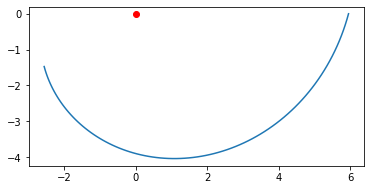

In [63]:
cam_radius = sp.lambdify([alpha, beta, theta], spr_radius)
thetas = np.linspace(cam_theta_min, cam_theta_max, 100)

fig, ax = plt.subplots(figsize=(6,6))
x = cam_radius(cam_alpha_coeff, cam_beta_coeff, thetas) * np.cos(thetas)
y = cam_radius(cam_alpha_coeff, cam_beta_coeff, thetas) * np.sin(thetas)

cam_center_dist = cam_radius(cam_alpha_coeff, cam_beta_coeff, cam_theta_max)
print(f"cam_center_dist = {cam_center_dist}")
ax.set_aspect('equal')
ax.plot(x, y)
ax.plot(0, 0, marker='o', c='red')
plt.show()